## Handwritten Hangul Analysis

Notebook for analysis of the Handwritten Hangul Dataset (src: ) by Ethan Payne.

### Preprocessing

Please see `data_wrapper.py` for data handling.

In [1]:
import pandas as pd
import numpy as np
from data_wrapper import DataWrapper

In [2]:
HandwrittenHangul = DataWrapper(raw_data_path = "Data\RawData", output_path = "Data", train_size = 0.75, rand_seed = 12345)

Overall data:

In [3]:
HandwrittenHangul.df.head()

,image_name,labels
0,ae_1_0.jpg,ae
1,ae_1_1.jpg,ae
2,ae_1_10.jpg,ae
3,ae_1_11.jpg,ae
4,ae_1_12.jpg,ae


In [4]:
HandwrittenHangul.df.describe()

,image_name,labels
count,2400,2400
unique,2400,30
top,ae_1_0.jpg,ae
freq,1,80


Training data:

In [5]:
HandwrittenHangul.train_df.head()

,image_name,labels
0,n_46_14.jpg,n
1,u_24_19.jpg,u
2,o_18_15.jpg,o
3,ch_94_3.jpg,ch
4,yae_26_7.jpg,yae


In [6]:
HandwrittenHangul.train_df.describe()

,image_name,labels
count,1800,1800
unique,1800,30
top,n_46_14.jpg,n
freq,1,60


Testing data:

In [7]:
HandwrittenHangul.test_df.head()

,image_name,labels
0,gg_70_16.jpg,gg
1,r_110_1.jpg,r
2,ng_17_6.jpg,ng
3,g_99_11.jpg,g
4,j_103_10.jpg,j


In [8]:
HandwrittenHangul.test_df.describe()

,image_name,labels
count,600,600
unique,600,30
top,gg_70_16.jpg,gg
freq,1,20


In [9]:
HandwrittenHangul.load_image("gg_70_16.jpg")

array([[[250, 250, 250],
        [253, 253, 253],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [249, 249, 249],
        [187, 187, 187]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [250, 250, 250],
        [188, 188, 188]],

       [[253, 253, 253],
        [250, 250, 250],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [251, 251, 251],
        [189, 189, 189]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [252, 252, 252],
        [190, 190, 190]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [252, 252, 252],
        [190, 190, 190]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [252, 252, 252],
        [190, 190, 190]]

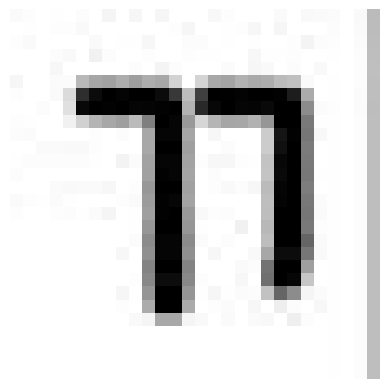

In [14]:
HandwrittenHangul.plot_image(HandwrittenHangul.load_image("gg_70_16.jpg"))